In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [6]:
# 1. 데이터 로딩
df = pd.read_csv('/Users/user/Documents/car_evaluation.csv')
print("데이터 샘플:")
print(df.head())

데이터 샘플:
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc


In [8]:
# 2. 결측치 확인
print("\n결측치 확인:")
print(df.isnull().sum())


결측치 확인:
vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64



타깃(label) 분포:
unacc
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


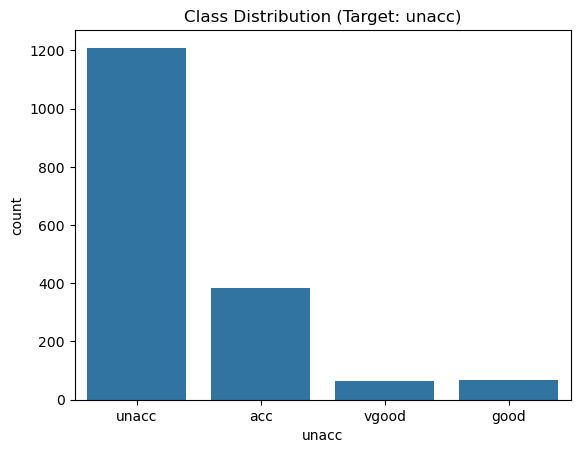

In [11]:
# 3. 레이블(타깃) 분포 확인
print("\n타깃(label) 분포:")
print(df['unacc'].value_counts())
sns.countplot(x='unacc', data=df)
plt.title('Class Distribution (Target: unacc)')
plt.show()

In [15]:
# 4. 범주형 변수 숫자 인코딩
categorical_cols = df.columns.tolist()  # 모든 컬럼 다 범주형임

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"{col} 인코딩 완료. 고유값: {le.classes_}")

print("\n인코딩 후 데이터 샘플:")
print(df.head())

vhigh 인코딩 완료. 고유값: ['high' 'low' 'med' 'vhigh']
vhigh.1 인코딩 완료. 고유값: ['high' 'low' 'med' 'vhigh']
2 인코딩 완료. 고유값: ['2' '3' '4' '5more']
2.1 인코딩 완료. 고유값: ['2' '4' 'more']
small 인코딩 완료. 고유값: ['big' 'med' 'small']
low 인코딩 완료. 고유값: ['high' 'low' 'med']
unacc 인코딩 완료. 고유값: ['acc' 'good' 'unacc' 'vgood']

인코딩 후 데이터 샘플:
   vhigh  vhigh.1  2  2.1  small  low  unacc
0      3        3  0    0      2    2      2
1      3        3  0    0      2    0      2
2      3        3  0    0      1    1      2
3      3        3  0    0      1    2      2
4      3        3  0    0      1    0      2


In [25]:
# 5. 인코딩 후 레이블 분포 확인
print("\n인코딩 후 타깃 분포:")
print(df['unacc'].value_counts())


인코딩 후 타깃 분포:
unacc
2    1209
0     384
1      69
3      65
Name: count, dtype: int64


In [23]:
# 6. 학습 데이터 준비
X = df.drop(columns=['unacc'])
y = df['unacc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# 7. 분류 모델 학습 및 평가
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    print(f"\n{name} 학습 및 평가:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Random Forest 학습 및 평가:
Accuracy: 0.9827
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        77
           1       1.00      0.93      0.96        14
           2       0.99      0.99      0.99       242
           3       1.00      0.92      0.96        13

    accuracy                           0.98       346
   macro avg       0.99      0.95      0.97       346
weighted avg       0.98      0.98      0.98       346


Decision Tree 학습 및 평가:
Accuracy: 0.9884
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        77
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00       242
           3       1.00      0.85      0.92        13

    accuracy                           0.99       346
   macro avg       0.97      0.96      0.96       346
weighted avg       0.99      0.99      0.99       346


Logistic Regression 학습 및 평가:
Accuracy: 0.6821
 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
